# Clustering



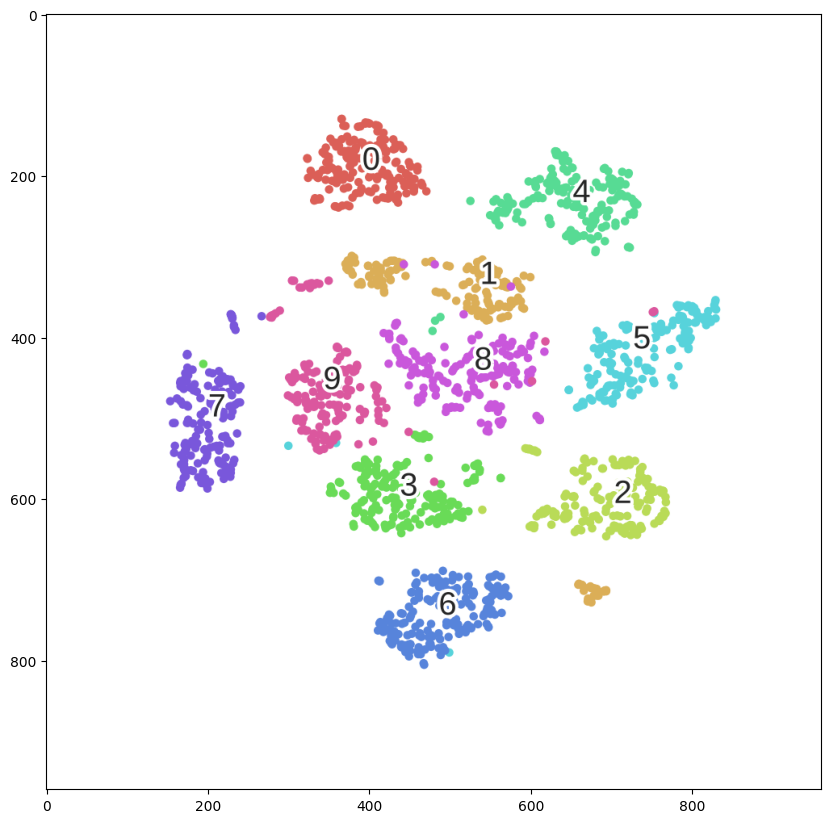

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('digits_cluster.png')

plt.figure(figsize = (10, 20))
plt.imshow(img)

### 1. Metrics in multidimensional space. In-cluster distance

##### 1. Nearest distance
- distance between the two closest objects (nearest neighbors) in different clusters;

##### 2. Full distance
- the greatest distance between any two objects in different clusters (i.e. the most distant neighbors);

##### 3. Weighted/Non-weighted paired average
- average distance between all pairs of objects in clusters;

##### 4. Weighted/Non-weighted centroid median
- average distance between all pairs of objects in clusters with weights depending on the size of the cluster;

https://habr.com/ru/post/101338/


### 2. Intercluster Distances:


The distance from $x = (x_{1}, \dots, x_{n})$ to $x' = (x'_{1}, \dots, x'_{n})$ $\in$ $\mathbb{R}^{n}$ is

$$
D(x,x^{'}) = \left( \sum_{i=1}^n \left| x_{i} - x'_{i} \right|^{q} \right)^{p},
$$

For p = 1, q=1 we get the taxicab norm, for p = 1/2, q=2 we get the Euclidean norm

The higher the power p the more metric penalizes the outliers.

### Classification of algorithms:


##### A. Hierarchical and flat.
Hierarchical algorithms (or taxonomy algorithms) build a system of nested partitions. So at the output we get a cluster tree, the _root_ of the tree is the entire sample, the _leaves_ are the smallest clusters.
Flat algorithms build one partition of objects into clusters.

##### B. Clear and shuffled.
Clear (or non-shuffled) algorithms assign a cluster number for each sample object, i.e. each object belongs to only one cluster. Shuffle algorithms associate a set of real values for each object, indicating the probability of the object's relation to the clusters. Each object belongs to each cluster with a certain probability.

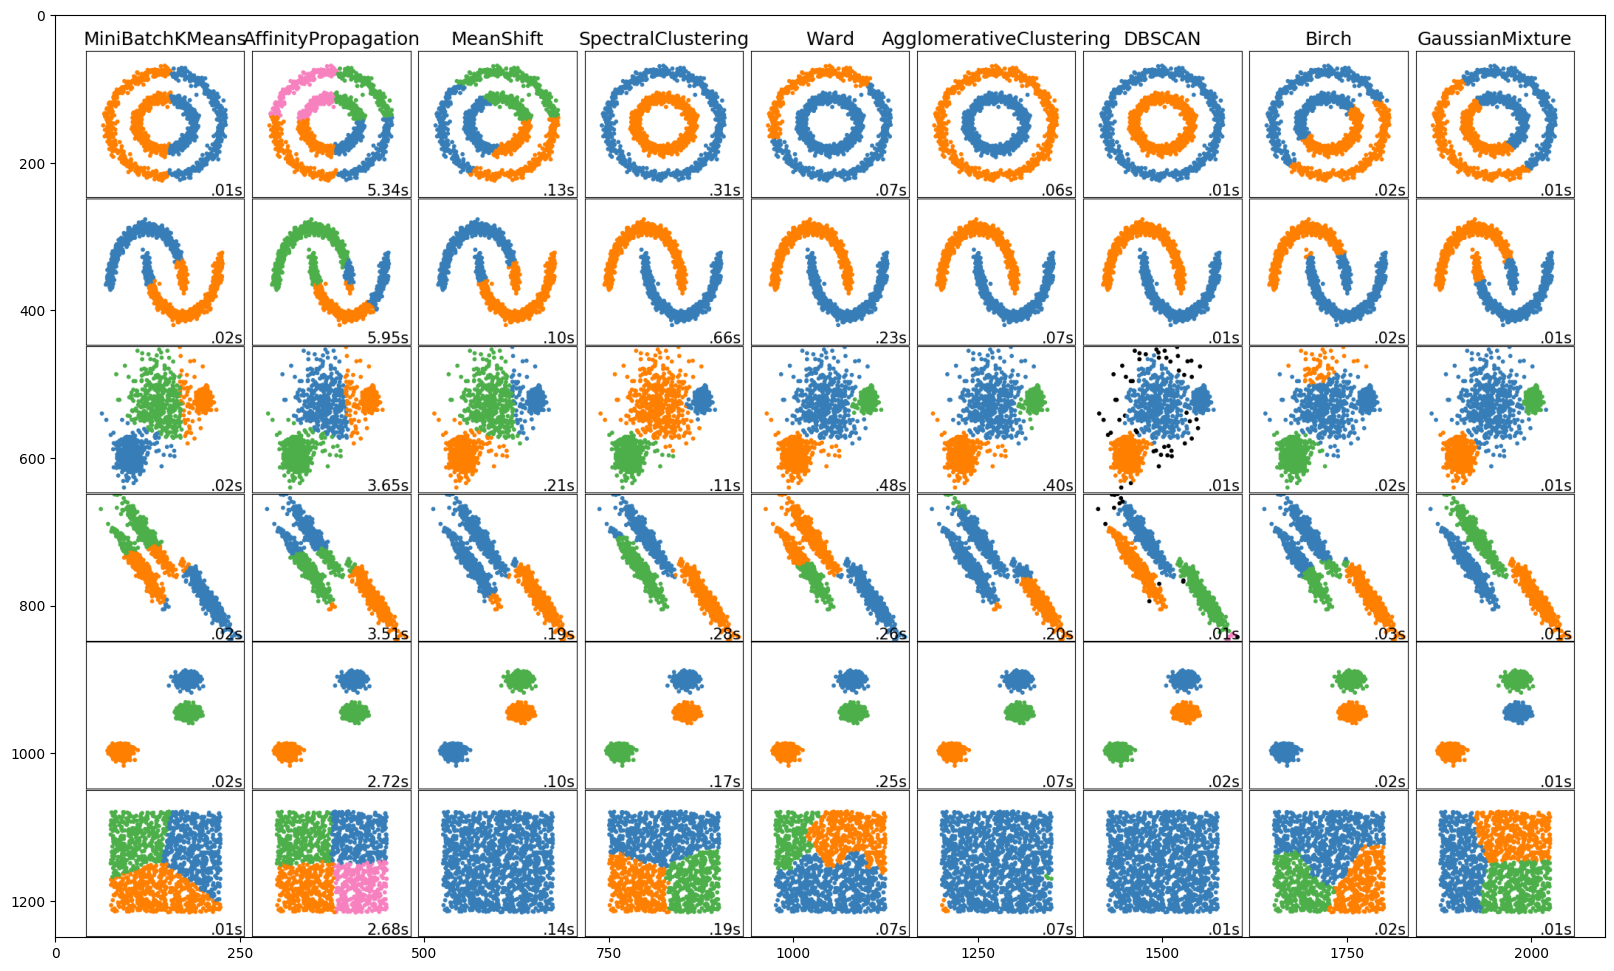

In [3]:
img = mpimg.imread('Clusters.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

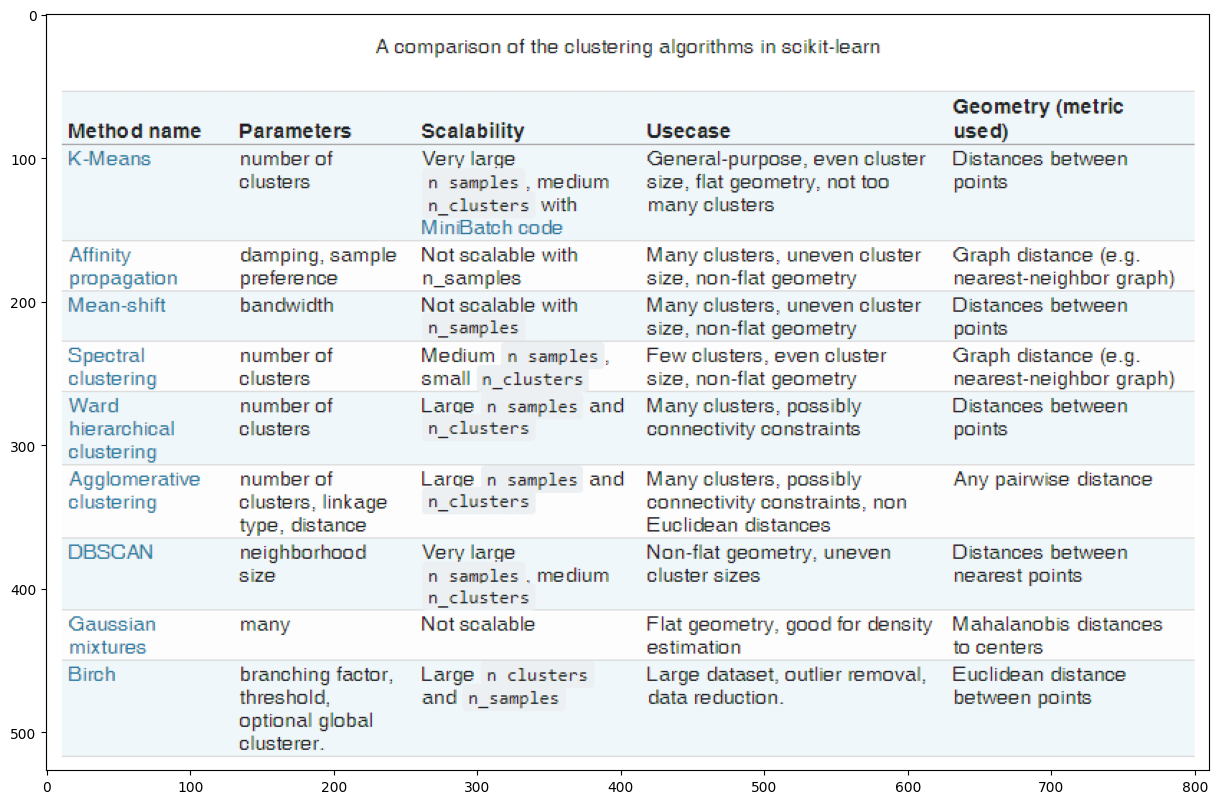

In [4]:
img = mpimg.imread('Table.png')
plt.figure(figsize=(15, 15))
plt.imshow(img)

https://scikit-learn.org/stable/modules/clustering.html

## Data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

In [5]:
from sklearn.datasets import fetch_20newsgroups

train_all = fetch_20newsgroups(subset='train')
# print topic names
print (train_all.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
# let's have 3 VERY different topics
new_dataset = fetch_20newsgroups(
    subset='train',
    categories=['comp.sys.mac.hardware', 'soc.religion.christian', 'rec.sport.hockey']
)

In [7]:
print (new_dataset.data[100])

From: generous@nova.sti.nasa.gov (Curtis Generous)
Subject: Apple Tape backup 40SC under System 7.x
Keywords: backup, tape,
Organization: NASA STI
Lines: 12


I need to get an Apple 40SC tape backup unit working under
Sys 7.0.x, but do not have any drivers/software to access
the device.  Does anyone know where I can fidn the tools
to access this device?

Appreciate any info/comments.

--curtis
-- 
Curtis C. Generous	generous@sti.nasa.gov		(703) 685-1140
NASA STI, Code JTT, Washington, DC 20546



In [8]:
import numpy as np

print(new_dataset.target)
print(np.unique(new_dataset.target, return_counts=True))

[0 0 1 ... 0 1 2]
(array([0, 1, 2], dtype=int64), array([578, 600, 599], dtype=int64))


In [9]:
print(new_dataset.data[-2])

From: scialdone@nssdca.gsfc.nasa.gov (John Scialdone)
Subject: CUT Vukota and Pilon!!!
News-Software: VAX/VMS VNEWS 1.41    
Organization: NASA - Goddard Space Flight Center
Lines: 32

I have been to all 3 Isles/Caps tilts at the Crap Centre this year, all Isles
wins and there is no justification for Vukota and Pilon to play for the Isles.
Vukota is absolutely the worst puck handler in the world!! He couldn't hit a
bull in the ass with a banjo!! Al must remember a few years back when Mick 
scored 3 goals in one period against the Caps in a 5-3 Isles win. I was there
and was astonished as was the rest of the crowd. Wake-up Al!!! Years later he's
gotten worse. He's a cheap shot artist and always ends up getting
stupid/senseless penalties. I think he would make a good police officier!!!

As for Pilon, he can't carry the puck out to center ice by himself. He either
makes a bad pass resulting in a turnover, or he attempts to bring the puck 
towards the neutral zone and skates right into an 

In [10]:
# number of entries
print(len(new_dataset.data))

1777


## Features

In [11]:
# let's create word-vectorizing matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create vector embeddings for words with frequencies (> 10) and (< 500) in all dataset
# 10 and 500 - may try different frequencies
#vectorizer = CountVectorizer(max_df=500, min_df=10)
vectorizer = TfidfVectorizer(max_df=500, min_df=10)  # weighted word matrix

matrix = vectorizer.fit_transform(new_dataset.data)

In [12]:
print(matrix)

  (0, 1246)	0.3906389385132699
  (0, 239)	0.09501028877632492
  (0, 1659)	0.07226670936760915
  (0, 2082)	0.09656717763921
  (0, 1846)	0.06741426312477893
  (0, 2991)	0.3895610830528872
  (0, 810)	0.0809427637021726
  (0, 2056)	0.09616720743610424
  (0, 319)	0.10054935380579341
  (0, 625)	0.05207173909126517
  (0, 3553)	0.07346689959490565
  (0, 1121)	0.06442816229222373
  (0, 838)	0.10154477899829951
  (0, 69)	0.06858267052730141
  (0, 2413)	0.10258878033617379
  (0, 3555)	0.06229087987706688
  (0, 3600)	0.05737015279917228
  (0, 2273)	0.057960021837659234
  (0, 1905)	0.08173536478989506
  (0, 3722)	0.09501028877632492
  (0, 926)	0.11742059318548873
  (0, 1991)	0.0711302768586001
  (0, 2048)	0.07488448956033757
  (0, 354)	0.06947437383545055
  (0, 900)	0.12357635170024021
  :	:
  (1776, 2952)	0.09409970904934684
  (1776, 2964)	0.08371608433275361
  (1776, 333)	0.09682965816117194
  (1776, 3224)	0.09228906102295453
  (1776, 2942)	0.09682965816117194
  (1776, 2036)	0.07189123445947446
 

## KMeans

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=1)
preds = model.fit_predict(matrix.toarray())
print(list(preds))

[1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 

In [14]:
print(list(new_dataset.target))

[0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 

In [15]:
# We have mixed up "0" and "2" clusters
# Let's change it!

mapping = {2 : 0, 1: 1, 0: 2}
mapped_preds = [mapping[pred] for pred in preds]
print (float(sum(mapped_preds != new_dataset.target)) / len(new_dataset.target))

0.9763646595385481


In [16]:
# have right answers in ~95 % examples!
# check the result with 'professional' classifier:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
print (cross_val_score(clf, matrix, new_dataset.target).mean())


0.9859313182465581


## Let's have 3 closer topics

In [17]:
dataset = fetch_20newsgroups(
    subset='train',
    categories=['comp.sys.mac.hardware', 'comp.os.ms-windows.misc', 'comp.graphics']
)

In [18]:
matrix = vectorizer.fit_transform(dataset.data)
model = KMeans(n_clusters=3, random_state=42)
preds = model.fit_predict(matrix.toarray())
print(preds)
print(dataset.target)

[1 0 2 ... 1 2 1]
[2 1 1 ... 2 0 2]


In [19]:
# mapping = {2 : 0, 1: 1, 0: 2}
# mapped_preds = [mapping[pred] for pred in preds]
print(float(sum(preds != dataset.target)) / len(dataset.target))

0.9087278950370793


In [20]:
# performance came down because the topics are very close to each other

clf = LogisticRegression()
print(cross_val_score(clf, matrix, dataset.target).mean())

0.9264143264143264
